## Dataset Prepare

In [1]:
import torch
from otx.core.config.data import DataModuleConfig, SubsetConfig
from otx.core.data.module import OTXDataModule
from otx.core.data.transform_libs.torchvision import PadtoSquare, ResizetoLongestEdge
from torchvision.transforms.v2 import Normalize, ToDtype

data_root = "../data/CVPR_demo_datumaro_seed0"

transforms = [
    ResizetoLongestEdge(size=1024, antialias=True),
    PadtoSquare(),
    ToDtype(dtype=torch.float32, scale=False),
    Normalize(mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], inplace=False)
]

datamodule = OTXDataModule(
    task="ZERO_SHOT_VISUAL_PROMPTING",
    config=DataModuleConfig(
        data_format="datumaro",
        data_root=data_root,
        train_subset=SubsetConfig(
            subset_name="train",
            batch_size=1,
            num_workers=4,
            transform_lib_type="TORCHVISION",
            transforms=transforms,
        ),
        val_subset=SubsetConfig(
            subset_name="val",
            batch_size=1,
            num_workers=4,
            transform_lib_type="TORCHVISION",
            transforms=transforms,
        ),
        test_subset=SubsetConfig(
            subset_name="test",
            batch_size=1,
            num_workers=4,
            transform_lib_type="TORCHVISION",
            transforms=transforms,
        ),
    ),
)

/home/harimkan/workspace/repo/otx-regression/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/harimkan/workspace/repo/otx-regression/src/otx/core/data/module.py:62: UserWarning: There are empty annotation items in train set, Of these, only 0.0% are used.
  dataset = pre_filtering(dataset, self.config.data_format, self.config.unannotated_items_ratio)


## Zero-Shot SAM

In [2]:
from otx.algo.visual_prompting.zero_shot_segment_anything import OTXZeroShotSegmentAnything

zero_shot_model = OTXZeroShotSegmentAnything(backbone="tiny_vit", label_info=datamodule.label_info)

In [3]:
dataloader = iter(datamodule.val_dataloader())

batch = next(dataloader)
results = zero_shot_model.learn(batch)

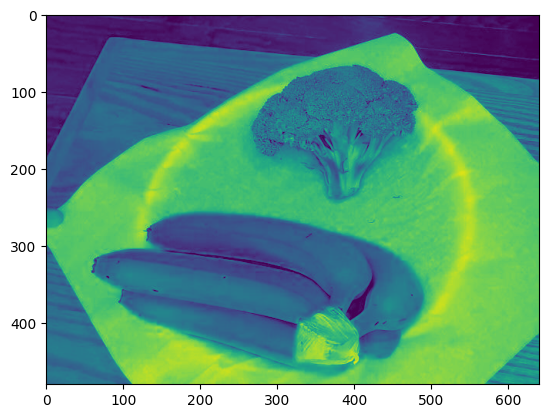

In [4]:
import matplotlib.pyplot as plt

plt.imshow(batch.images[0][2])


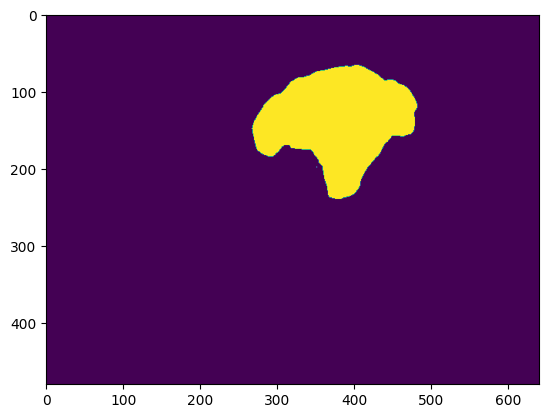

In [5]:
plt.imshow(results[1][0][2])

In [6]:
batch2 = next(dataloader)

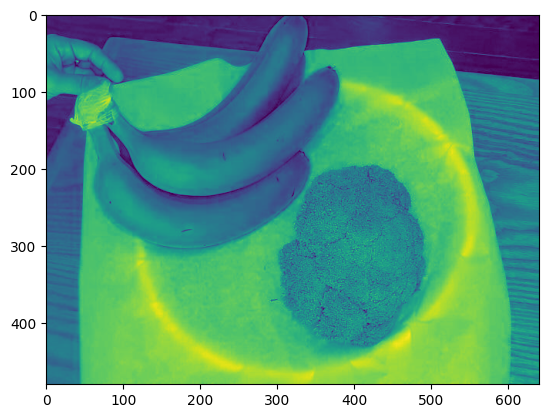

In [7]:
plt.imshow(batch2.images[0][2])

In [9]:
results2 = zero_shot_model.infer(batch2, **results[0])

In [22]:
results[1][0][2].size()

torch.Size([480, 640])

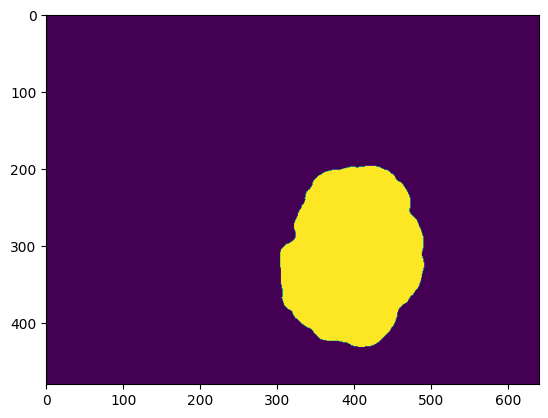

In [25]:
plt.imshow(results2.masks[0][0])